In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
home_credit_des = pd.read_csv('HomeCredit_columns_description.csv',encoding='ISO-8859-1')

In [50]:
home_credit_des

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
214,217,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
215,218,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
216,219,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
217,220,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of ...,NaN


In [51]:
application_train = pd.read_csv('application_train.csv')

In [52]:
application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
application_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [54]:
application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [55]:
(application_train.isnull().sum()/len(application_train)*100).sort_values(ascending = False).head(50)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [56]:
null_col = application_train.isnull().sum().sort_values(ascending = False)
null_col = null_col[null_col.values >(0.35*len(application_train))]
len(null_col)
#các cột có giá trị null trên 35%

49

In [57]:
a = application_train['NAME_CONTRACT_TYPE'].value_counts()

In [58]:
a = pd.DataFrame(a)

Text(0.5, 1.0, 'Did People Repay on Time ?')

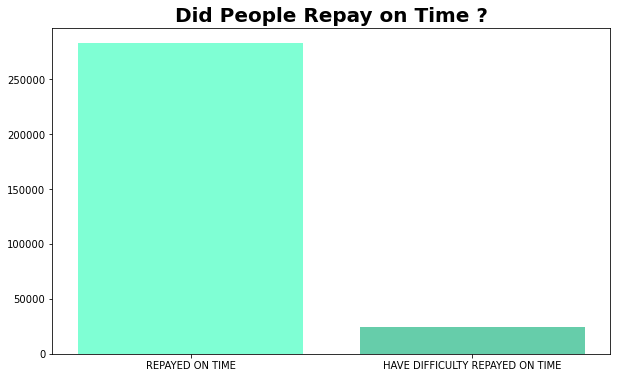

In [59]:
a = application_train["TARGET"].value_counts()
df = pd.DataFrame(a).reset_index()
df
fig,ax0 = plt.subplots(figsize = (10,6))
ax0.bar(df.index,df.TARGET,color = ['#7FFFD4', '#66CDAA'])
ax0.set_xticks([0,1])
x= ["REPAYED ON TIME", 'HAVE DIFFICULTY REPAYED ON TIME' ]
plt.xticks([0,1], x)
plt.title('Did People Repay on Time ?',size = 20,weight ='bold')

# Đa số mọi người trả đúng hạn


In [60]:
 application_train['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Text(0.89, 109000, '105059')

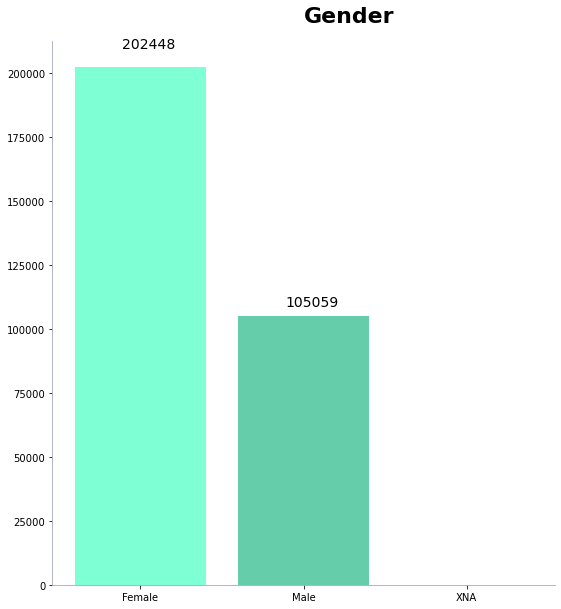

In [61]:
a = application_train["CODE_GENDER"].value_counts()
df = pd.DataFrame(a).reset_index()
df
fig,ax0 = plt.subplots(figsize = (9,10))
ax0.bar(df.index,df.CODE_GENDER,color = ['#7FFFD4', '#66CDAA','blue'])
x= ["Female", 'Male','XNA' ]
plt.xticks([0,1,2], x)
ax0.spines[['top', "right"]].set_visible(False)
ax0.text(1, 220000, 'Gender', size=22, weight="bold")
ax0.spines[['left', 'bottom']].set_color('#a1a6b3')
ax0.text(-0.115, 210000, '202448', size="14", alpha=1)
ax0.text(0.89,109000, '105059', size="14", alpha=1)

# Số lượng Female vay tiền gần như là gấp đôi so với Male


In [126]:
  # Tính % của nam và nữ gặp khó khăn( hoặc không trả được) trong khoản vay('Target = 1')
perc_m_and_f = application_train[['CODE_GENDER', 'TARGET']].groupby(['CODE_GENDER'],as_index=False).mean()

In [128]:
perc_m_and_f

,CODE_GENDER,TARGET
0,F,0.069992
1,M,0.101419


In [ ]:
#XNA là null

In [65]:
application_train.CODE_GENDER.value_counts()
application_train.loc[application_train.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F' 
application_train.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

Text(0.5, 1.0, 'Percentage of M and F have difficulty repayed on time(%)')

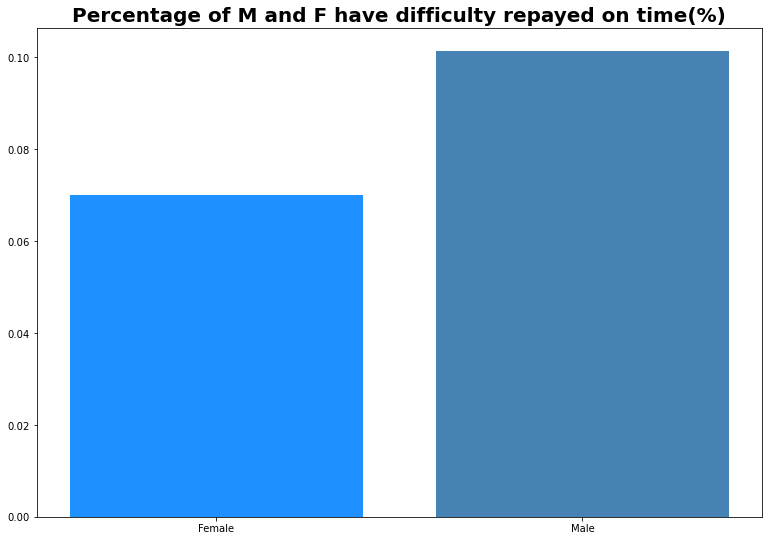

In [131]:

df = pd.DataFrame(perc_m_and_f).reset_index()
df
fig,ax = plt.subplots(figsize = (13,9))
ax.bar(df.index,df.TARGET,color = ["#1E90FF", "#4682B4"])
x= ["Female", 'Male']
plt.xticks([0,1], x)
ax.set_title('Percentage of M and F have difficulty repayed on time(%)', loc='center', size="20",weight = 'bold')


# Mặc dù số lượng Female gần như gấp đôi, nhưng tỉ lệ gặp khó khăn trong việc trả nợ của Male lại là xấp xỉ 10% còn Female là 7%

# Độ Tuổi của những người vay

In [67]:
application_train[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,-9461,-637,-3648.0,-2120,-1134.0
1,-16765,-1188,-1186.0,-291,-828.0
2,-19046,-225,-4260.0,-2531,-815.0
3,-19005,-3039,-9833.0,-2437,-617.0
4,-19932,-3038,-4311.0,-3458,-1106.0
...,...,...,...,...,...
307506,-9327,-236,-8456.0,-1982,-273.0
307507,-20775,365243,-4388.0,-4090,0.0
307508,-14966,-7921,-6737.0,-5150,-1909.0
307509,-11961,-4786,-2562.0,-931,-322.0


# Nếu để ý , t sẽ thấy rằng đây là ngày, nhưng nó chứa các giá trị âm không hợp lệ. Như vậy, phải convert lại.

In [68]:
def convert_age(age_days_negative):
    age_days_positive = -age_days_negative
    age_years = age_days_positive/365 
    return age_years
application_train['DAYS_BIRTH'] =  application_train['DAYS_BIRTH'].apply(convert_age)
application_train['DAYS_EMPLOYED'] = application_train['DAYS_EMPLOYED'].apply(convert_age)

In [69]:
day_col = ["DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]

In [70]:
application_train[day_col]= abs(application_train[day_col])

In [71]:
#TEST
print(application_train['DAYS_ID_PUBLISH'].unique())

[2120  291 2531 ... 6194 5854 6211]


# # Plot the distribution of ages in years

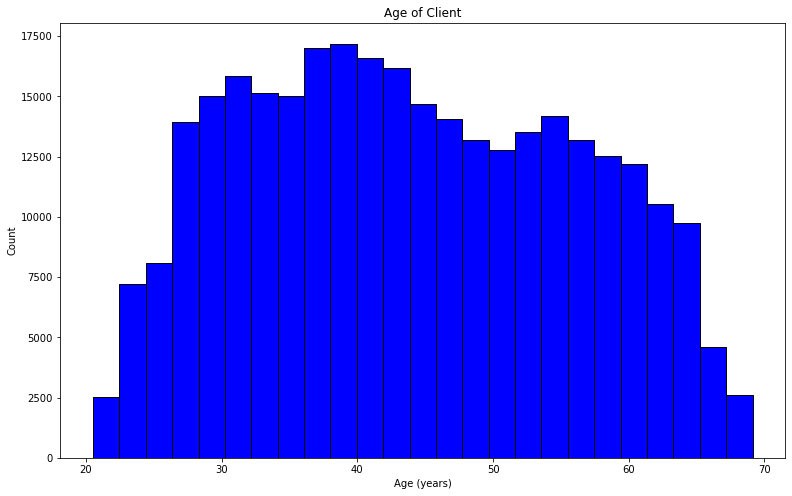

In [132]:

fig,ax = plt.subplots(figsize = (13,8))


plt.hist(application_train['DAYS_BIRTH'], color = 'blue', edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

In [133]:
cat_perc = application_train[['DAYS_BIRTH', 'TARGET']].groupby([application_train['DAYS_BIRTH']],as_index=False).mean()

In [134]:
application_train['DAYS_BIRTH']

0         25.920548
1         45.931507
2         52.180822
3         52.068493
4         54.608219
            ...    
307506    25.553425
307507    56.917808
307508    41.002740
307509    32.769863
307510    46.180822
Name: DAYS_BIRTH, Length: 307511, dtype: float64

Text(0, 0.5, 'Number')

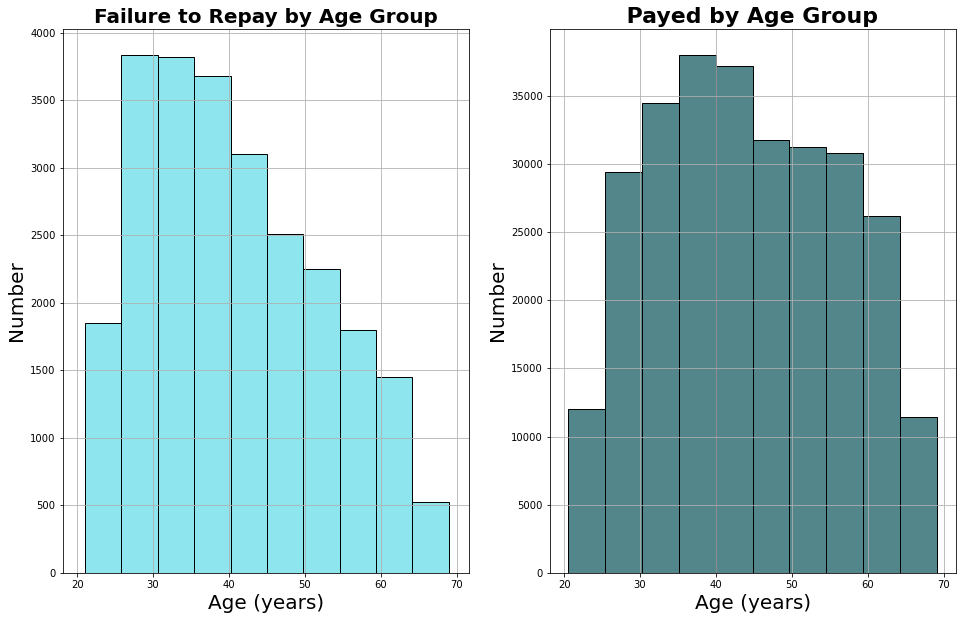

In [135]:
fig, (ax1, ax2) = plt.subplots(ncols=  2, sharex = True, figsize = (16, 10))
ax1.hist(application_train[application_train['TARGET']==1]['DAYS_BIRTH'],color='#8EE5EE', edgecolor = 'k', label='Target=1')
ax1.set_xticks(np.arange(0, 71,10))
ax1.set_title('Failure to Repay by Age Group', weight = 'bold', size="20")
ax1.grid()
ax1.set_xlabel('Age (years)',size = 20)
ax1.set_ylabel('Number',size = 20)



ax2.hist(application_train[application_train['TARGET']==0]['DAYS_BIRTH'],color = '#53868B',edgecolor = 'k', label='Target=1')
ax2.set_title(' Payed by Age Group ', weight = 'bold', size="22")
ax2.grid()
ax2.set_xlabel('Age (years)',size = 20)
ax2.set_ylabel('Number',size = 20)

# Có thể thấy những người k trả đc nợ nằm ở quanh ngưỡng 30 tuổi, tuy nhiên số lượng người đó giảm đi khi độ tuổi tăng lên
# Từ đó thấy có thể kết luận rằng những người trẻ thường k có khả năng trả nợ trong thời hạn
# Yếu tố tuổi rất quan trọng nên rất cần cho vào model Machine Learning

In [76]:
application_train['NAME_FAMILY_STATUS']

0         Single / not married
1                      Married
2         Single / not married
3               Civil marriage
4         Single / not married
                  ...         
307506               Separated
307507                   Widow
307508               Separated
307509                 Married
307510                 Married
Name: NAME_FAMILY_STATUS, Length: 307511, dtype: object

In [136]:
perc_fam_status = application_train[['NAME_FAMILY_STATUS', 'TARGET']].groupby(['NAME_FAMILY_STATUS'],as_index=False).mean()

In [137]:
perc_fam_status

,NAME_FAMILY_STATUS,TARGET
0,Civil marriage,0.099446
1,Married,0.075599
2,Separated,0.081942
3,Single / not married,0.098077
4,Unknown,0.000000
5,Widow,0.058242


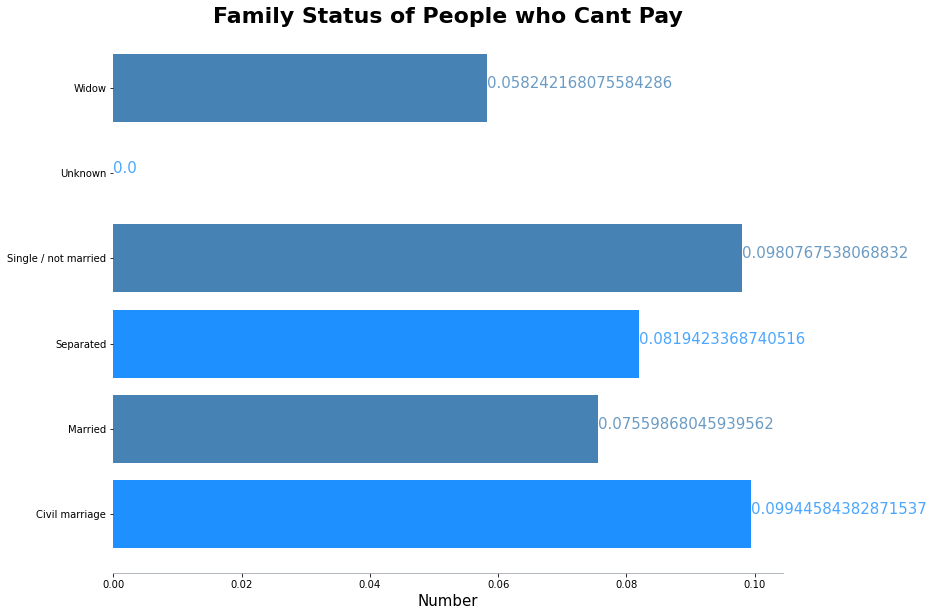

In [138]:
fig, ax = plt.subplots(figsize=(12, 10))

color = ["#1E90FF", "#4682B4"]*6

ax.barh(perc_fam_status["NAME_FAMILY_STATUS"], perc_fam_status["TARGET"], color=color, alpha = 1)
ax.spines[['top', "right", 'left']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('#a1a6b3')

ax.set_xlabel('Number', size = "15")
ax.set_title('Family Status of People who Cant Pay', weight = 'bold', size="22")
ax.set_xlabel('Number', size = "15")
ax.set_title('Family Status of People who Cant Pay', weight = 'bold', size="22")
for i in range(len(perc_fam_status)):
    ax.text(perc_fam_status['TARGET'][i] , i, f"{float(perc_fam_status['TARGET'][i])}", color =color[i], size="15", alpha = 0.8)

# Xét về tỷ lệ không trả được nợ, Hôn nhân dân sự có tỷ lệ không trả được cao nhất (10%), với Widow là thấp nhất (ngoại trừ Unknow).

In [151]:
nbr_children = application_train[['CNT_CHILDREN', 'TARGET']].groupby(['CNT_CHILDREN'],as_index=False).count()

In [140]:
nbr_children 

,CNT_CHILDREN,TARGET
0,0,215371
1,1,61119
2,2,26749
3,3,3717
4,4,429
5,5,84
6,6,21
7,7,7
8,8,2
9,9,2


In [146]:
perc_children = application_train[['CNT_CHILDREN', 'TARGET']].groupby(['CNT_CHILDREN'],as_index=False).mean()

In [147]:
perc_children.sort_values(by='TARGET', ascending=False, inplace=True)

In [148]:
perc_children 

,CNT_CHILDREN,TARGET
9,9,1.000000
11,11,1.000000
6,6,0.285714
4,4,0.128205
3,3,0.096314
1,1,0.089236
2,2,0.087218
5,5,0.083333
0,0,0.077118
7,7,0.000000


Text(0.5, 0, 'Number')

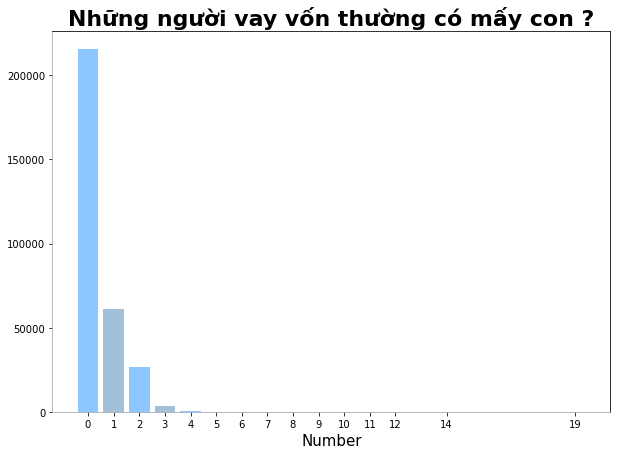

In [152]:
fig, ax = plt.subplots(figsize=(10, 7))

color = ["#1E90FF", "#4682B4"]*6

ax.bar(nbr_children["CNT_CHILDREN"], nbr_children["TARGET"], color=color, alpha = 0.5)
#ax.spines[['top', "right", 'left']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('#a1a6b3')
ax.set_xticks(nbr_children['CNT_CHILDREN'])
ax.set_xlabel('Number', size = "15")
ax.set_title('Những người vay vốn thường có mấy con ?', weight = 'bold', size="22")
ax.set_xlabel('Number', size = "15")



# Hầu hết khách hàng vay vốn đều không có con. Số lượng khoản vay của khách hàng có một con  bằng 1/4 so với k có con, số lượng khoản vay của khách hàng có hai con bằng 1/8; khách hàng có 3, 4 con trở lên hiếm hơn nhiều.

Text(0.5, 0, 'Number')

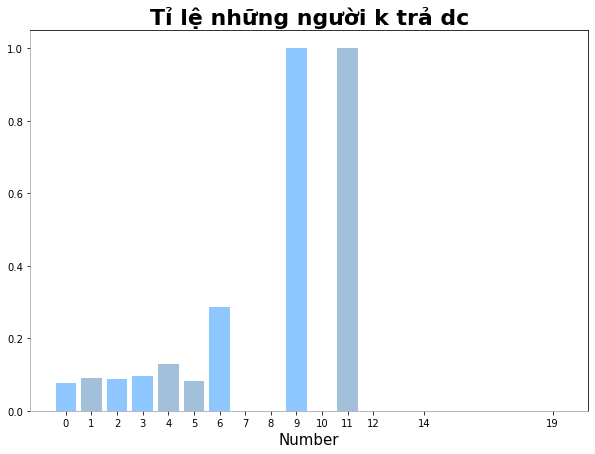

In [150]:
fig, ax = plt.subplots(figsize=(10, 7))

color = ["#1E90FF", "#4682B4"]*6

ax.bar(perc_children["CNT_CHILDREN"], perc_children["TARGET"], color=color, alpha = 0.5)
#ax.spines[['top', "right", 'left']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('#a1a6b3')
ax.set_xticks(perc_children['CNT_CHILDREN'])
ax.set_xlabel('Number', size = "15")
ax.set_title('Tỉ lệ những người k trả dc', weight = 'bold', size="22")
ax.set_xlabel('Number', size = "15")





# Đối với việc trả nợ, những khách hàng không có con, 1, 2, 3 và 5 có tỷ lệ không trả nợ ở mức trung bình (10%). Các khách hàng có 4 và 6 con ở mức trên trung bình về tỷ lệ phần trăm khoản vay chưa hoàn trả (trên 25% đối với gia đình có 6 con).

 # Đối với khách hàng có 9 hoặc 11 con, tỷ lệ khoản vay không được hoàn trả là 100%.

In [97]:
nbr_fam_mem = application_train[['CNT_FAM_MEMBERS', 'TARGET']].groupby(['CNT_FAM_MEMBERS'],as_index=False).count()

In [98]:
nbr_fam_mem

,CNT_FAM_MEMBERS,TARGET
0,1.0,67847
1,2.0,158357
2,3.0,52601
3,4.0,24697
4,5.0,3478
5,6.0,408
6,7.0,81
7,8.0,20
8,9.0,6
9,10.0,3


Text(0.5, 0, 'Number')

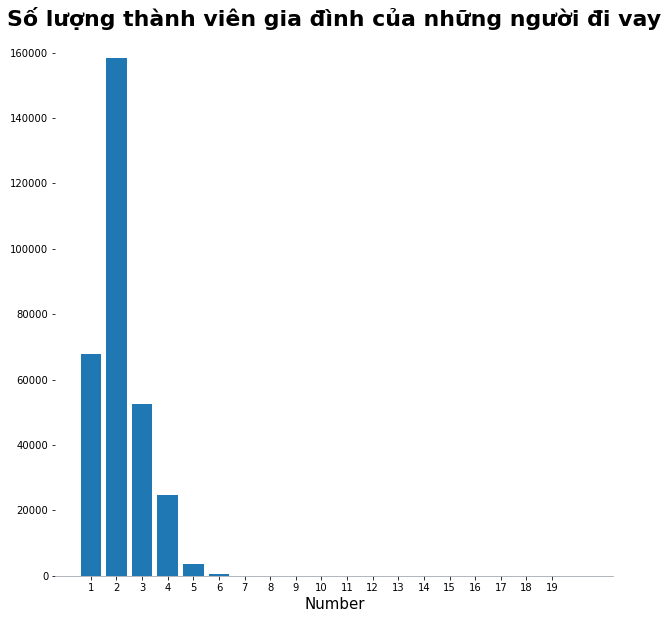

In [106]:
fig, ax = plt.subplots(figsize=(10, 10))

color = ["#1E90FF", "#4682B4"]*6

ax.bar(nbr_fam_mem['CNT_FAM_MEMBERS'], nbr_fam_mem['TARGET'])
ax.spines[['top', "right", 'left']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('#a1a6b3')
ax.set_xticks(np.arange(1, 20,1))

ax.set_xlabel('Number', size = "15")
ax.set_title('Số lượng thành viên gia đình của những người đi vay', weight = 'bold', size="22")
ax.set_xlabel('Number', size = "15")



# # Khách hàng có thành viên gia đình gồm 2 người là nhiều nhất, tiếp theo là 1 (người độc thân), 3 (gia đình có một con) và 4. Tuy nhiên số lượng ngày càng ít khi số thành viên tăng lên

In [104]:
# Tỉ lệ k trả đc nợ 
perc_fam_mem = application_train[['CNT_FAM_MEMBERS', 'TARGET']].groupby(['CNT_FAM_MEMBERS'],as_index=False).mean()

Text(0.5, 0, 'Number')

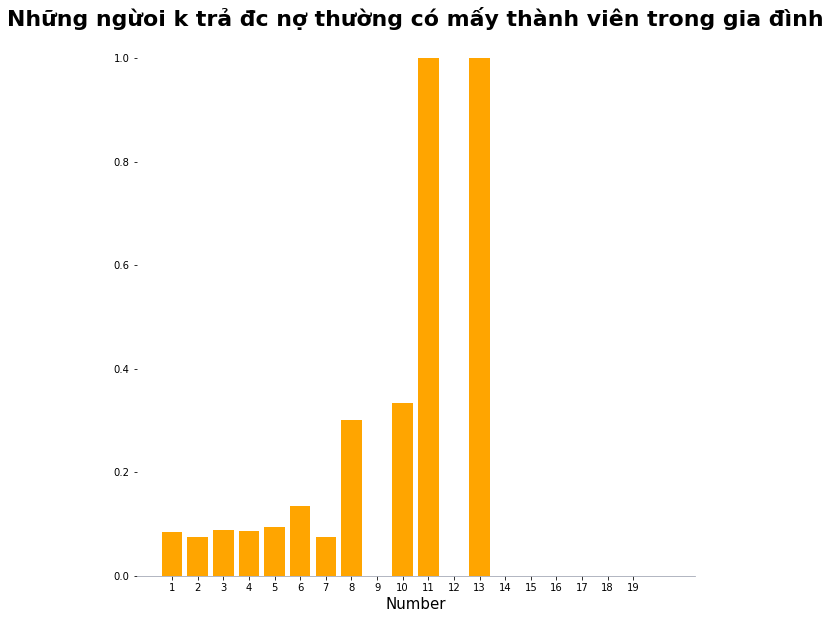

In [107]:
fig, ax = plt.subplots(figsize=(10, 10))

color = ["#1E90FF", "#4682B4"]*6

ax.bar(perc_fam_mem['CNT_FAM_MEMBERS'], perc_fam_mem['TARGET'],color ='orange')
ax.spines[['top', "right", 'left']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('#a1a6b3')
ax.set_xticks(np.arange(1, 20,1))

ax.set_xlabel('Number', size = "15")
ax.set_title('Những ngừoi k trả đc nợ thường có mấy thành viên trong gia đình', weight = 'bold', size="22")
ax.set_xlabel('Number', size = "15")




# Có 2 khách hàng có quy mô gia đình 11 và 13, cả 2 người đấy đều k trả  đc nợ nên tỷ lệ không trả nợ là  100%. Các gia đình khác có 10 hoặc 8 thành viên có tỷ lệ không trả được nợ trên 30%. Các gia đình có 6 thành viên trở xuống có tỷ lệ trả nợ gần mức trung bình 10%.

In [124]:
application_train[['ORGANIZATION_TYPE','NAME_INCOME_TYPE']].head(30)

,ORGANIZATION_TYPE,NAME_INCOME_TYPE
0,Business Entity Type 3,Working
1,School,State servant
2,Government,Working
3,Business Entity Type 3,Working
4,Religion,Working
5,Other,State servant
6,Business Entity Type 3,Commercial associate
7,Other,State servant
8,XNA,Pensioner
9,Electricity,Working


# Ở đây, ta thấy rằng bất cứ nơi nào NAME_INCOME_TYPE là Pensioner thì ở đó chỉ chúng ta có giá trị null trong cột ORGANIZATON_TYPE. Hãy xem số lượng Pensioner và sau đó chúng tôi sẽ quyết định có áp dụng giá trị rỗng của ORGANIZATION_TYPE với Pensioner hay không.

In [125]:
application_train.NAME_INCOME_TYPE.value_counts()    #Check the counts for each in NAME_INCOME_TYPE

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

# Vì vậy, từ những dữ liệu này, ta có thể kết luận rằng giá trị Pensioner xấp xỉ bằng giá trị rỗng trong cột ORGANIZATION_TYPE. Vì vậy, giá trị bị thiếu ở mức nào đó
# Tương tự như vậy việc áp giá trị rỗng của OCCUPATION_TYPE với Pensioner vì hầu hết các giá trị rỗng cho OCCUPATION_TYPE so với giá trị biến loại Income, ta nhận thấy rằng “Pensioner” là giá trị thường xuyên nhất, gần như 80% giá trị rỗng của OCCUPATION_TYPE

In [ ]:
#application_train['ORGANIZATION_TYPE'] = application_train['ORGANIZATION_TYPE'].replace('XNA', 'Pensioner')
#application_train['OCCUPATION_TYPE'].fillna('Pensioner' , inplace = True)

In [108]:
nbr_icome_type = application_train[['NAME_INCOME_TYPE', 'TARGET']].groupby(['NAME_INCOME_TYPE'],as_index=False).count()

In [111]:
nbr_icome_type

,NAME_INCOME_TYPE,TARGET
0,Businessman,10
1,Commercial associate,71617
2,Maternity leave,5
3,Pensioner,55362
4,State servant,21703
5,Student,18
6,Unemployed,22
7,Working,158774


Text(0.5, 0, 'Number')

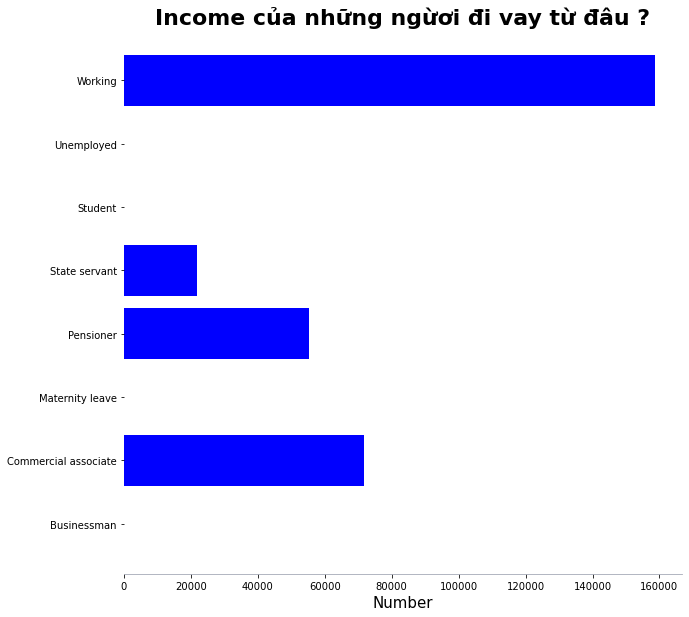

In [117]:
fig, ax = plt.subplots(figsize=(10, 10))

color = ["#1E90FF", "#4682B4"]*6

ax.barh(nbr_icome_type['NAME_INCOME_TYPE'], nbr_icome_type['TARGET'],color ='blue')
ax.spines[['top', "right", 'left']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('#a1a6b3')


ax.set_xlabel('Number', size = "15")
ax.set_title('Income của những ngừơi đi vay từ đâu ?', weight = 'bold', size="22")
ax.set_xlabel('Number', size = "15")


# # Hầu hết những người nộp đơn cho khoản vay là thu nhập từ Working, tiếp theo là Commercial asscociate, Pensioner và State servant 

In [120]:
perc_income_type = application_train[['NAME_INCOME_TYPE', 'TARGET']].groupby(['NAME_INCOME_TYPE'],as_index=False).mean()

Text(0.5, 0, '%')

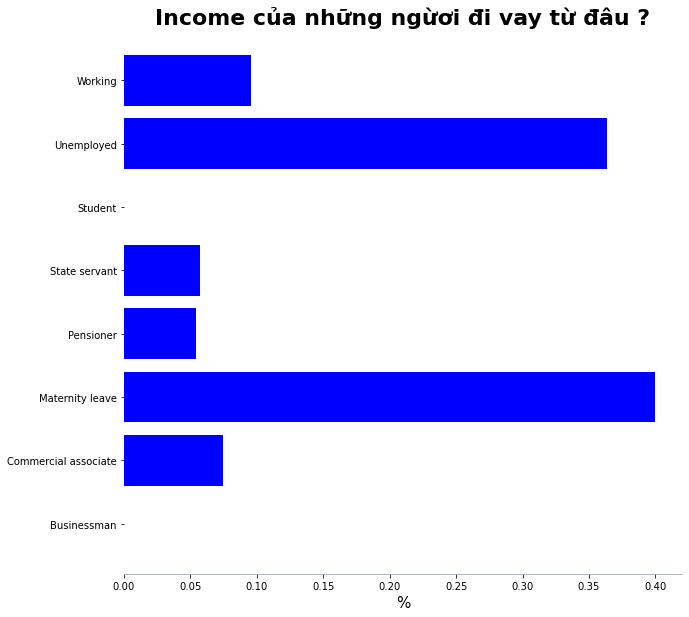

In [123]:
fig, ax = plt.subplots(figsize=(10, 10))

color = ["#1E90FF", "#4682B4"]*6

ax.barh(perc_income_type['NAME_INCOME_TYPE'], perc_income_type['TARGET'],color ='blue')
ax.spines[['top', "right", 'left']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('#a1a6b3')



ax.set_title('Income của những ngừơi đi vay từ đâu ?', weight = 'bold', size="22")
ax.set_xlabel('%', size = "15")



# Những người nộp đơn với loại thu nhập Nghỉ thai sản có tỷ lệ không trả lại khoản vay gần 40%, tiếp theo là Thất nghiệp (37%). Các loại thu nhập còn lại đều ở mức trung bình dưới 10% do không trả lại các khoản cho vay.